In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#Locale settings
import locale
# Set to German locale to get comma decimal separater
locale.setlocale(locale.LC_NUMERIC, "de_DE")

plt.rcParams['text.usetex'] = True 
plt.rcParams.update({'font.size': 10,'font.family': 'serif'})
plt.rcParams['figure.figsize'] = (6.5, .5*4.5)

plt.rcParams['axes.formatter.use_locale'] = True

plt.rcParams['text.latex.preamble'] = r'\usepackage{icomma}\usepackage{upgreek}'
#plt.rcParams['text.latex.preamble'] = r'\renewcommand{\unit}[1]{\,{\rm #1}}'

In [2]:
def func(t, a, T):
    return a*(1-np.exp(-t/T))

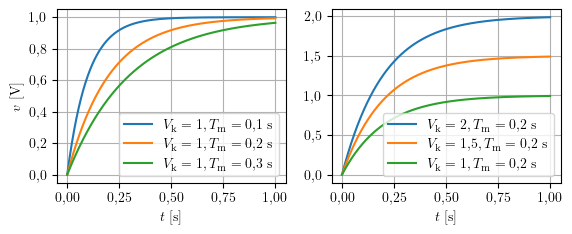

In [10]:
time = np.linspace(0,1,1000)
y = func(time, 1, 0.1)
y2 = func(time, 1, 0.2)
y3 = func(time, 1, 0.3)
y4 = func(time, 2, 0.2)
y5 = func(time, 1.5, 0.2)
y6 = func(time, 1, 0.2)

plt.subplot(1,2,1)
plt.plot(time, y, label=r'$V_{\rm k} = 1, T_{\rm m} = 0,1$ s')
plt.plot(time, y2, label=r'$V_{\rm k} = 1, T_{\rm m} = 0,2$ s')
plt.plot(time, y3, label=r'$V_{\rm k} = 1, T_{\rm m} = 0,3$ s')
plt.xlabel('$t$ [s]')
plt.ylabel('$v$ [V]')
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(time, y4, label=r'$V_{\rm k} = 2, T_{\rm m} = 0,2$ s')
plt.plot(time, y5, label=r'$V_{\rm k} = 1,5, T_{\rm m} = 0,2$ s')
plt.plot(time, y6, label=r'$V_{\rm k} = 1 , T_{\rm m} = 0,2$ s')
plt.grid()
plt.legend()
plt.xlabel('$t$ [s]')
plt.savefig('fig_teorija/DCmodeli.pdf', format='pdf', bbox_inches='tight')

<h2>Prenosna karakteristika pojacavaca u klasi b</h2>

In [10]:
plt.rcParams['figure.figsize'] = (.45*6.5, .45*6.5)

In [11]:
x = np.linspace(-5,5,2001)
PAb = np.zeros(2001)
for i in range (0, len(x)):
    if(np.abs(x[i])<0.7):
        PAb[i] = 0
    if(x[i]>=0.7):
        PAb[i] = x[i] - 0.7
    if(x[i]<-0.7):
        PAb[i] = x[i] + 0.7

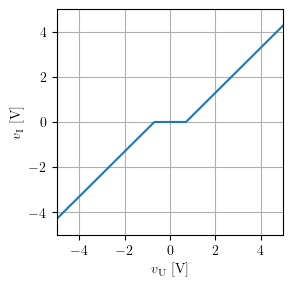

In [12]:
plt.plot(x, PAb, label='$|V_{BE}| = 0.7 V$')
#plt.legend()
plt.grid()
plt.xlabel(r'$v_{\rm U}$ [V]')
plt.ylabel(r'$v_{\rm I}$ [V]')
plt.ylim([-5,5])
plt.xlim([-5,5])
plt.savefig('fig_teorija/PAbkka.pdf', format='pdf', bbox_inches='tight')

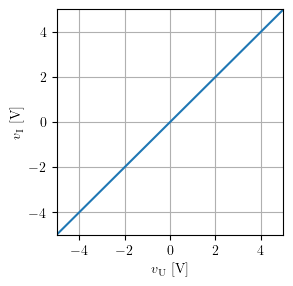

In [13]:
PAABb = x

plt.plot(x, PAABb)
plt.grid()
plt.xlabel(r'$v_{\rm U}$ [V]')
plt.ylabel(r'$v_{\rm I}$ [V]')
plt.ylim([-5,5])
plt.xlim([-5,5])
plt.savefig('fig_teorija/PAABkka.pdf', format='pdf', bbox_inches='tight')

<h2>Deo za gresku prilikom racunanja ucestanosti</h2>

In [14]:
plt.rcParams['figure.figsize'] = (.45*6.5, .45*6.5)

In [15]:
x = np.linspace(0,1,1000)
funkcija = np.zeros(len(x))
for i in range(0, len(x)):
    funkcija[i] = x[i]/(1 - (x[i])**2)

C:\Users\David\AppData\Local\Temp\ipykernel_6316\1801604872.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  funkcija[i] = x[i]/(1 - (x[i])**2)


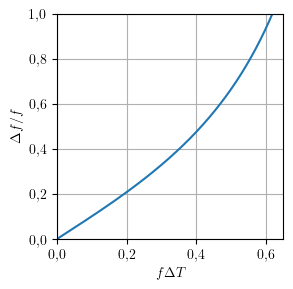

In [16]:
fig = plt.figure()

plt.plot(x, funkcija)
plt.xlabel('$f \Delta T$')
#plt.ylabel(r'\frac: $\frac{\Delta f}{f}$')
plt.ylabel('$\Delta f / f$')
plt.xlim([0,0.65])
plt.ylim([0,1])
plt.grid()
plt.savefig('fig_teorija/fGreska.pdf', format='pdf', bbox_inches='tight')

<h2>Crossover</h2>

In [2]:
plt.rcParams['figure.figsize'] = (.75*6.5, .75*4.5)

In [ ]:
x = np.linspace(0,np.pi*2,1000)
sin = 5*np.sin(x)
f = np.zeros(len(x))
for i in range (0, len(x)):
    if((sin[i] > 0.6) and (x[i] < np.pi)):
        f[i] = sin[i] - 0.6
    if((sin[i] < -0.6) and (x[i] > np.pi)):
        f[i] = sin[i] + 0.6

plt.plot(x, sin, 'b', label=r'$v_{\rm U}$')
plt.plot(x, f, 'r', label=r'$v_{\rm I}$')
plt.ylabel(r'$v$ [V]')
plt.xlabel(r'$\omega t$ [rad]')
plt.grid()
plt.legend()
plt.xlim(0,np.pi*2)
plt.ylim(-np.pi*2,np.pi*2)
plt.savefig('fig_teorija/crossover.pdf', format='pdf', bbox_inches='tight')

<h2>Prenosna karakteristika NF filtra</h2>

In [48]:
plt.rcParams['figure.figsize'] = (.45*6.5, .45*6.5)

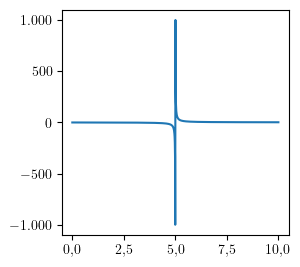

In [54]:
s = np.linspace(0,10,1000)
H = s/(s-5)

plt.plot(s,H)

In [87]:
USE_WIDGETS = True

def importEssentialLibs(USE_WIDGETS):
    import numpy as np
    if USE_WIDGETS:
        %matplotlib widget
    else:
        %matplotlib inline
    import matplotlib as mpl
    mpl.rc('text', usetex = True)
    mpl.rc('font', family = 'serif', size = 10)
    import matplotlib.pyplot as plt
    import scipy.signal as signal
    
    return np, mpl, plt, signal

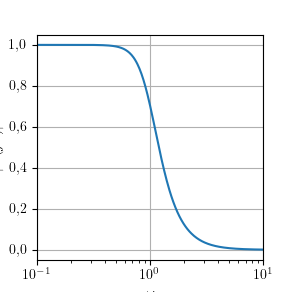

In [88]:
np, mpl, plt, signal = importEssentialLibs(USE_WIDGETS)
from dosutils import zplane
import ipywidgets as widgets

Aa = 40
Ap = 1

fig = plt.figure(figsize = (.45*6.5, .45*6.5))

N = 3

z, p, k = signal.buttap(N)

plt.clf()
a = np.array(np.poly(p))
b = k*np.array(np.poly(z))
# ako nema korenova polinoma, np.poly() vraca float broj, pa se taj broj u tom slucaju mora pretvoriti u np.array
if a.shape == ():
    a = np.array([a])
if b.shape == ():
    b = np.array([b])


# Frekvencijska karakteristika
w, H = signal.freqs(b, a, worN = 512)
Ha = abs(H)

ax = fig.add_subplot(1,1,1)
ax.semilogx(w, Ha)
#ax.set_title('Amplitudska karakteristika')
ax.set_ylabel('$|H(j\omega)|$')
ax.set_xlabel('$\omega$');
ax.set_xlim([0.1, 10])
plt.grid()

plt.savefig('fig_teorija/NFkka.pdf', format='pdf', bbox_inches='tight')